<img src="https://shwetkm.github.io/upxlogo.png"></img>
# Wine Quality Prediction

Goal of this project is to **Predict Quality** of a Wine based on sensory data with physicochemical tests data provided for Red Wine. 

Business questions needs to be identified (at least 7-8 questions) 

1. [Check and Remove Duplicate Data](#1)
2. [Remove Blank Spaces from Colunm Names](#2)
3. [Univariate and bivariate analysis.](#3)
4. [Data preparation: dividing quality score into 3 different categories, etc.](#4) 
5. [Create visualizations to depict how residual sugar, density and alcohol affect the quality of the wine.](#5)
6. [Other variable observations.](#6) 
7. [Faulty Wines: Characteristics that can influence wine quality negatively.](#7) 
8. [Difference between the contents of Good and Bad Wine](#8)

# 2. Column Description  

The data set is related to different attributes of red wine. 

**fixed acidity**: Value of item Present <br>
**volatile acidity**: Value of item Present <br>
**citric acid**: Value of item Present <br>
**residual sugar**: Value of item Present <br> 
**chlorides**: Value of item Present <br>
**free sulfur dioxide**: Value of item Present <br>
**total sulfur dioxide**: Value of item Present <br>
**density**: Value of item Present <br>
**pH**: Value of item Present  <br> 
**sulphates**: Value of item Present  <br>
**alcohol** : Value of item Present  <br>




## 3. Initial Exploratory Data Analysis  <a id=3>

In the first step we are going to acquire data into dataframes for further processing.

In [28]:
# Importing the packages and dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns

# Get current size
fig_size = plt.rcParams["figure.figsize"]

# Set figure width to 20 and height to 10
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

In [29]:
wine_data = pd.read_csv("winequality.csv", delimiter = ';')


In [170]:
print ('shape of dataset :{s}'.format (s=wine_data.shape))   # Checking the shape of the wine_data dataframe
print ('columns of dataset :{s}'.format (s=list(wine_data)))   # Columns of Dataset

shape of dataset :(1599, 12)
columns of dataset :['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


In [30]:
pd.set_option('display.max_columns',500)
wine_data.head()                                    # CHecking the first 5 rows

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [31]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Now check for the datatypes of different columns in the dataset which will be helpful in further data processing operations. 

In [6]:
wine_data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

We can see that our dataset has numerical values in them and also we have few of the categorical columns. <br><br>Lets check for any of the missing data items in different attributes for our datasets.  

In [32]:
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In our training dataset we have no missing data values for all the columns. 


For better understanding the values in the dataset lets have a look into the statistics of our datasets.

In [33]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [34]:
wine_data.shape

(1599, 12)

## Remove Blank Spaces from Column Names <a id='2'>

In [35]:
wine_data.rename(columns={'fixed acidity':'fixed_acidity', 'volatile acidity' : 'volatile_acidity', 'citric acid' :'citric_acid' ,'residual sugar': 'residual_sugar' ,'free sulfur dioxide' :'free_sulfur_dioxide' },inplace = 'True')
wine_data.columns                  

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

## Dulpicate Data <a id='1'>

In [11]:
wine_data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [36]:
wine_data[wine_data.duplicated()]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
76,8.8,0.410,0.64,2.20,0.093,9.0,42.0,0.99860,3.54,0.66,10.5,5
91,8.6,0.490,0.28,1.90,0.110,20.0,136.0,0.99720,2.93,1.95,9.9,6
93,7.7,0.490,0.26,1.90,0.062,9.0,31.0,0.99660,3.39,0.64,9.6,5
102,8.1,0.545,0.18,1.90,0.080,13.0,35.0,0.99720,3.30,0.59,9.0,6
105,8.1,0.575,0.22,2.10,0.077,12.0,65.0,0.99670,3.29,0.51,9.2,5


In [37]:
wine_data.duplicated().sum()

240

## There are 240 Duplicate Rows

## Remove Dulpicate Data

In [38]:
wine_data.drop_duplicates(inplace=True)
wine_data.shape

(1359, 12)

In [39]:
wine_data['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

#### Some Important Observations from the Statistics of Training dataset:

In [40]:
wine_data.quality.value_counts().sort_index()

3     10
4     53
5    577
6    535
7    167
8     17
Name: quality, dtype: int64

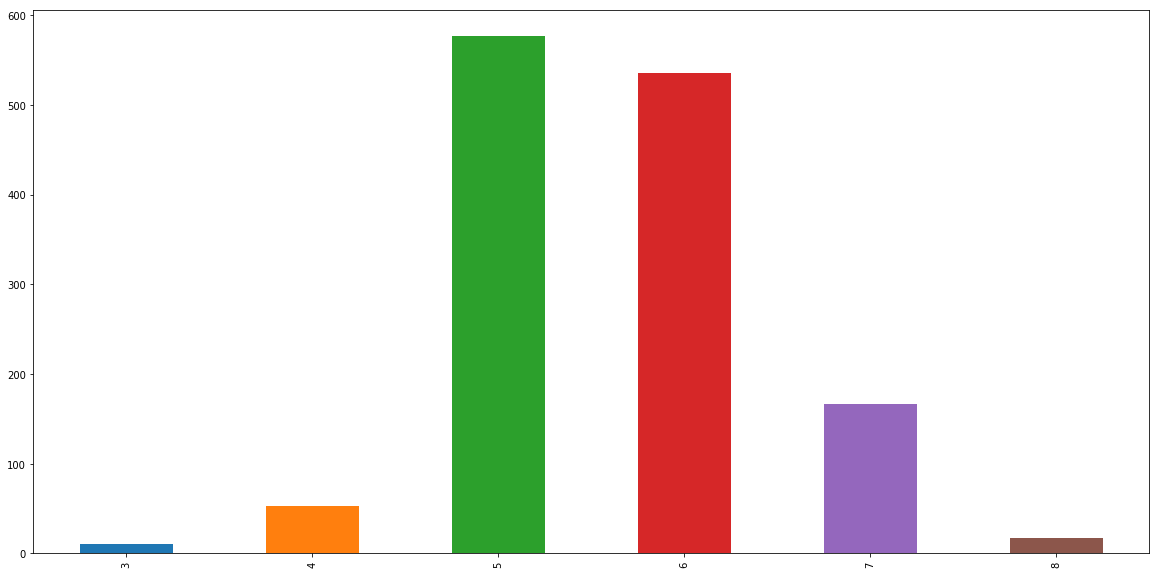

In [41]:
#plt.plot(x='quality',y='count' ,data=wine_data.quality)

#sns.countplot(x='quality' ,data=wine_data.quality)

wine_data.quality.value_counts().sort_index().plot(kind='bar')


1. Column "Quality" has values ranging from 3 to 8 with a mean value of 5.6 and Median as 6 
2. "Alcohol" has values ranging from 8.40 to 14.90 with a mean value of 10.42. 


# Data preparation: dividing quality score into 3 different categories, etc.<a id= 4> 

In [43]:
#Deriving Category column
#wine_data['Category'] = pd.cut(wine_data['quality'], [0,5,7,10], labels=["inferior", "fine", "superior"],right=False) 
#wine_data.head(10)

conditions = [
    (wine_data['quality'] >= 7),
    (wine_data['quality'] <= 4)
]
rating = ['superior','inferior']
wine_data['rating'] = np.select(conditions,rating,default='fine')
wine_data.rating.value_counts()

fine        1112
superior     184
inferior      63
Name: rating, dtype: int64

In [44]:
wine_data.groupby('rating').mean()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
rating,,,,,,,,,,,,
fine,8.251169,0.538898,0.261286,2.484397,0.089691,16.428058,49.424910,0.996834,3.309083,0.648094,10.259173,5.481115
inferior,7.871429,0.724206,0.173651,2.684921,0.095730,12.063492,34.444444,0.996689,3.384127,0.592222,10.215873,3.841270
superior,8.820109,0.405870,0.372880,2.703804,0.076049,13.972826,35.358696,0.995963,3.288587,0.745598,11.552808,7.092391


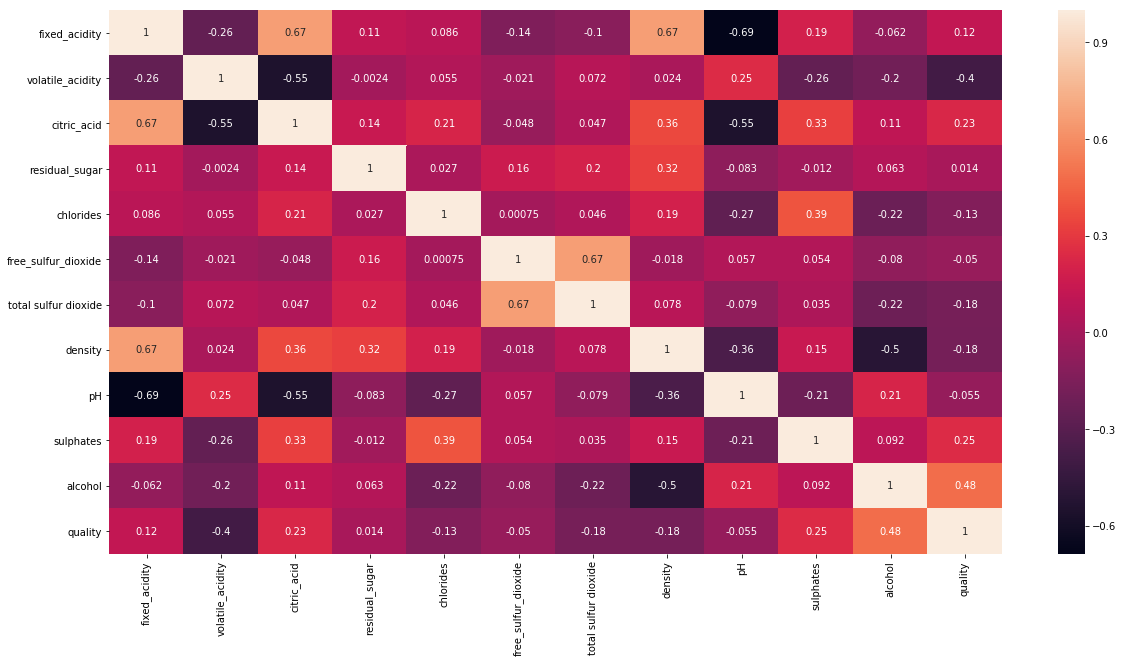

In [45]:

correlation = wine_data.corr()
#sns.heatmap(correlation,annot=True , linewidths=0, vmin=1 )
sns.heatmap(correlation,annot=True , linewidths=0 )

In [46]:
correlation['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.480343
sulphates               0.248835
citric_acid             0.228057
fixed_acidity           0.119024
residual_sugar          0.013640
free_sulfur_dioxide    -0.050463
pH                     -0.055245
chlorides              -0.130988
total sulfur dioxide   -0.177855
density                -0.184252
volatile_acidity       -0.395214
Name: quality, dtype: float64

## Alcohol has a Positive effect on Wine Quality followed by Sulphates

## It is also clear that volatile acidity has a negative impact on Good quality Wines

C:\Users\aasnani\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


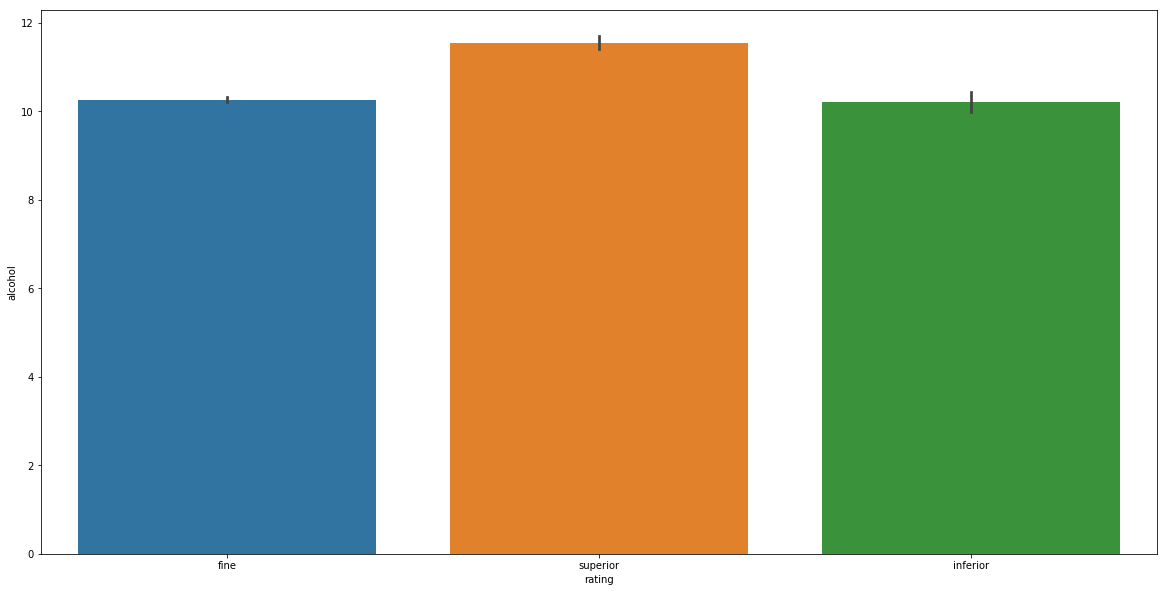

In [47]:
#alchol vs wine plots boxplot
#linear reg (plot , x= alchool , y = sugar , col = rating , data = wine_data)
# classification statsmodel for prediction distplot



sns.barplot(x=wine_data.rating,y= wine_data.alcohol)

C:\Users\aasnani\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


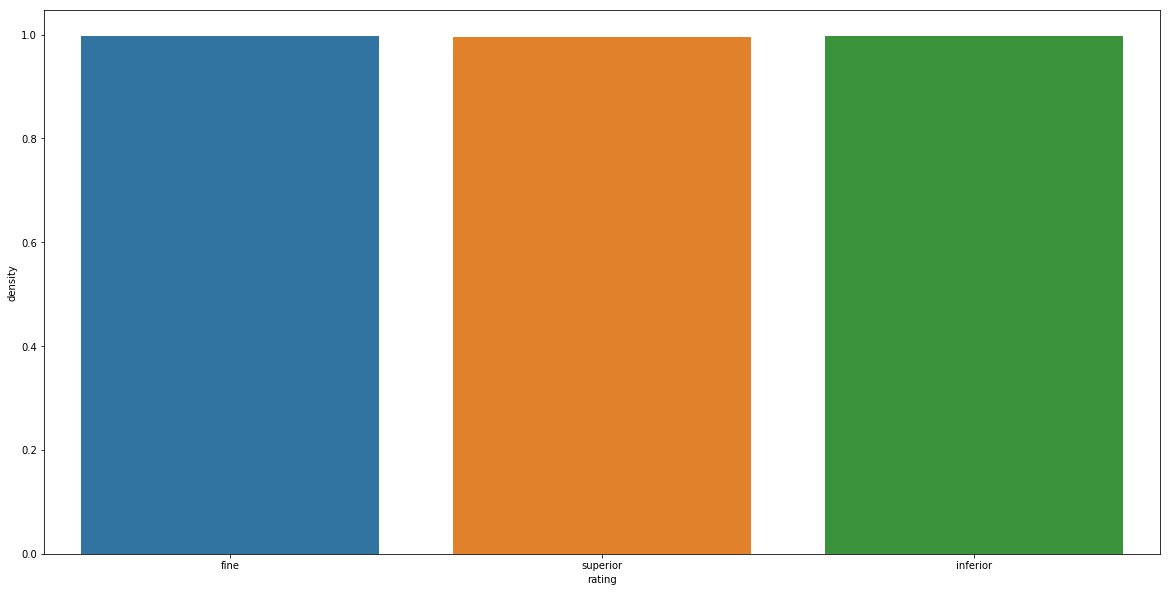

In [73]:
#Creating plot for status
sns.barplot(x=wine_data.rating,y= wine_data.density)

## How residual sugar, density and alcohol affect the quality of the wine.<a id= 5>

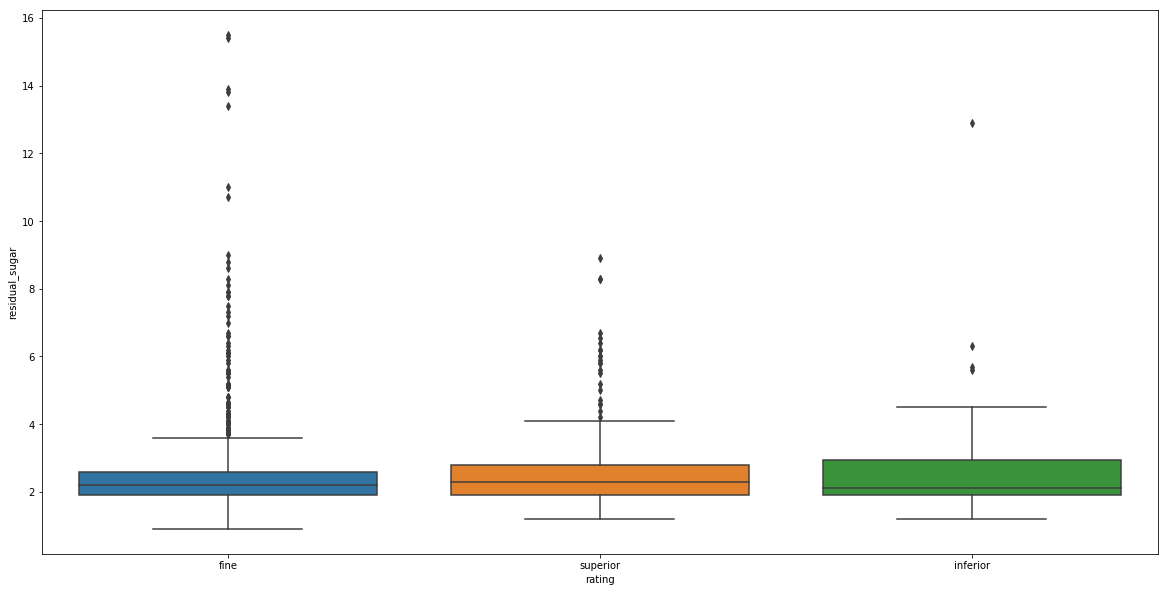

In [50]:
sns.boxplot(y='residual_sugar', x = 'rating', data = wine_data)

## Create visualizations to depict how residual sugar, density and alcohol affect the quality of the wine.

In [52]:
# Lets have a look at the correlations between the attributes.
wine_bivariate = wine_data[['residual_sugar', 'density' ,'alcohol' , 'quality']]
corr = wine_bivariate.corr()
corr

,residual_sugar,density,alcohol,quality
residual_sugar,1.000000,0.324522,0.063281,0.013640
density,0.324522,1.000000,-0.504995,-0.184252
alcohol,0.063281,-0.504995,1.000000,0.480343
quality,0.013640,-0.184252,0.480343,1.000000


In [54]:
#Creating dataframe for residual sugar', 'density' ,'alcohol' , 'quality'
wine_quality = wine_data.groupby( ['residual_sugar', 'density' ,'alcohol' , 'rating'] ).size().reset_index(name='count')
wine_quality.head(5)

,residual_sugar,density,alcohol,rating,count
0,0.9,0.99007,12.7,fine,1
1,1.2,0.99240,13.0,superior,1
2,1.2,0.99258,12.5,fine,2
3,1.2,0.99331,11.5,fine,1
4,1.2,0.99460,10.0,superior,1


# Faulty Wines: Characteristics that can influence wine quality negatively.<a id=7>

In [55]:
# Poor Wines Characteristics
faulty_wine_data = wine_data[wine_data['rating'] == 'inferior']
faulty_wine_data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,rating
18,7.4,0.590,0.08,4.4,0.086,6.0,29.0,0.9974,3.38,0.50,9.0,4,inferior
38,5.7,1.130,0.09,1.5,0.172,7.0,19.0,0.9940,3.50,0.48,9.8,4,inferior
41,8.8,0.610,0.30,2.8,0.088,17.0,46.0,0.9976,3.26,0.51,9.3,4,inferior
45,4.6,0.520,0.15,2.1,0.054,8.0,65.0,0.9934,3.90,0.56,13.1,4,inferior
73,8.3,0.675,0.26,2.1,0.084,11.0,43.0,0.9976,3.31,0.53,9.2,4,inferior


In [56]:
faulty_corr = faulty_wine_data.corr()
faulty_corr

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.264587,0.618461,-0.107863,0.154137,0.183288,0.096812,0.733124,-0.648622,0.195743,-0.423175,-0.129709
volatile_acidity,-0.264587,1.000000,-0.511816,-0.156797,-0.033984,-0.159749,-0.217281,-0.140093,0.354737,-0.236821,0.146024,-0.283044
citric_acid,0.618461,-0.511816,1.000000,0.084318,0.482913,0.302661,0.353126,0.486010,-0.635780,0.512580,-0.253210,0.005596
residual_sugar,-0.107863,-0.156797,0.084318,1.000000,-0.050771,-0.108956,0.241847,0.050949,-0.034712,-0.007524,0.352758,0.012681
chlorides,0.154137,-0.033984,0.482913,-0.050771,1.000000,0.272226,0.095656,0.244249,-0.452355,0.735429,-0.205459,-0.156034
free_sulfur_dioxide,0.183288,-0.159749,0.302661,-0.108956,0.272226,1.000000,0.618515,0.154836,-0.100739,0.425005,-0.201691,0.051304
total sulfur dioxide,0.096812,-0.217281,0.353126,0.241847,0.095656,0.618515,1.000000,0.206087,-0.176114,0.343221,-0.124581,0.158330
density,0.733124,-0.140093,0.486010,0.050949,0.244249,0.154836,0.206087,1.000000,-0.474814,0.329658,-0.443928,-0.203671
pH,-0.648622,0.354737,-0.635780,-0.034712,-0.452355,-0.100739,-0.176114,-0.474814,1.000000,-0.459154,0.547844,-0.034691
sulphates,0.195743,-0.236821,0.512580,-0.007524,0.735429,0.425005,0.343221,0.329658,-0.459154,1.000000,-0.148881,0.043376


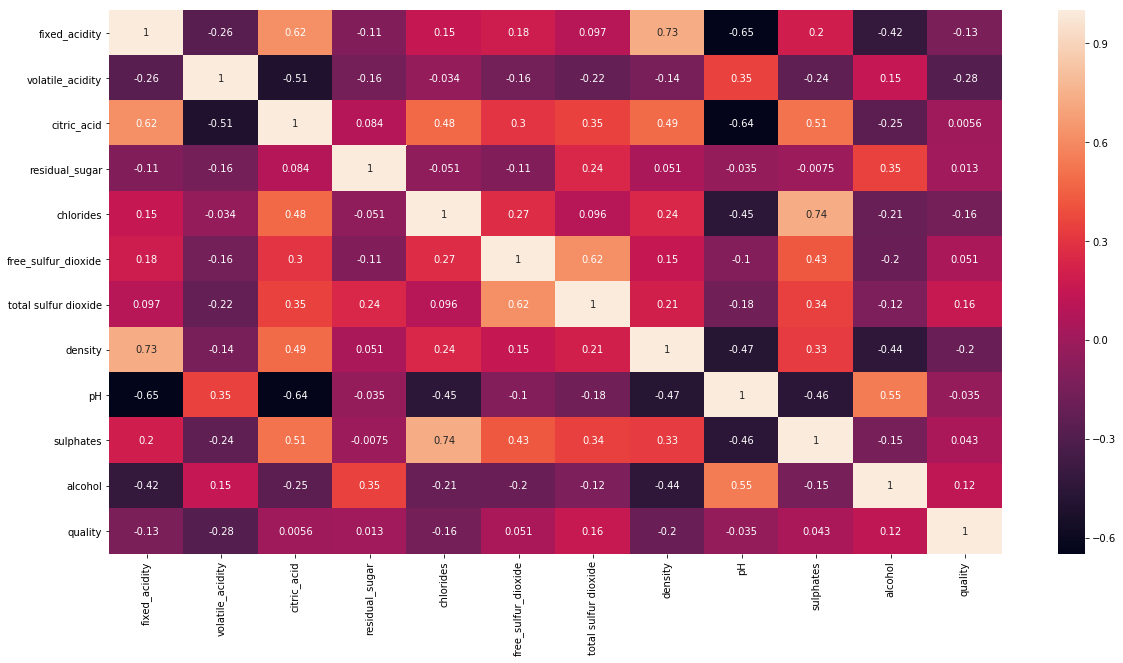

In [57]:
sns.heatmap(data = faulty_corr , annot=True , linewidths=0 )

In [58]:
fc= faulty_corr['quality'].sort_values(ascending=False)
fc

quality                 1.000000
total sulfur dioxide    0.158330
alcohol                 0.124405
free_sulfur_dioxide     0.051304
sulphates               0.043376
residual_sugar          0.012681
citric_acid             0.005596
pH                     -0.034691
fixed_acidity          -0.129709
chlorides              -0.156034
density                -0.203671
volatile_acidity       -0.283044
Name: quality, dtype: float64

In [59]:
best_wine_data = wine_data[wine_data['rating'] == 'superior']
best_corr = best_wine_data.corr()
bc = best_corr['quality'].sort_values(ascending=False)
bc


quality                 1.000000
alcohol                 0.191529
sulphates               0.069534
volatile_acidity        0.049212
citric_acid             0.016653
free_sulfur_dioxide    -0.006474
total sulfur dioxide   -0.008288
residual_sugar         -0.029611
pH                     -0.029954
fixed_acidity          -0.061084
chlorides              -0.081863
density                -0.127771
Name: quality, dtype: float64

In [60]:
diff = bc-fc
diff


alcohol                 0.067124
chlorides               0.074171
citric_acid             0.011057
density                 0.075900
fixed_acidity           0.068624
free_sulfur_dioxide    -0.057778
pH                      0.004738
quality                 0.000000
residual_sugar         -0.042292
sulphates               0.026158
total sulfur dioxide   -0.166618
volatile_acidity        0.332256
Name: quality, dtype: float64

## volatile acidity has a negative impact on Wine Quality

In [61]:
diff.dtype

dtype('float64')

In [72]:
diffpd = pd.DataFrame(diff)
diffpd.sort_values(diffpd.columns[0],ascending = False)

,quality
volatile_acidity,0.332256
density,0.075900
chlorides,0.074171
fixed_acidity,0.068624
alcohol,0.067124
sulphates,0.026158
citric_acid,0.011057
pH,0.004738
quality,0.000000
residual_sugar,-0.042292
